<a href="https://colab.research.google.com/github/cpalme28/MAT-421/blob/main/Module_F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Homework 7 - Coree Palmer

**20.1 - Numerical Differentiation Problem Statement**

* A numerical grid is an evenly spaced set of points over the domain of a function over some interval.
* The spacing/step size of a numerical grid is the distance between the adjacent points on the grid.
* In Python, a function f(x) can be represented over an interval by computing its value on a grid. Although the function itself may be continuous, this discrete or discretized representation is useful for numerical calculations and corresponds to data sets that may be acquired in engineering or science practice.


In [2]:
import numpy as np
import matplotlib.pyplot as plt

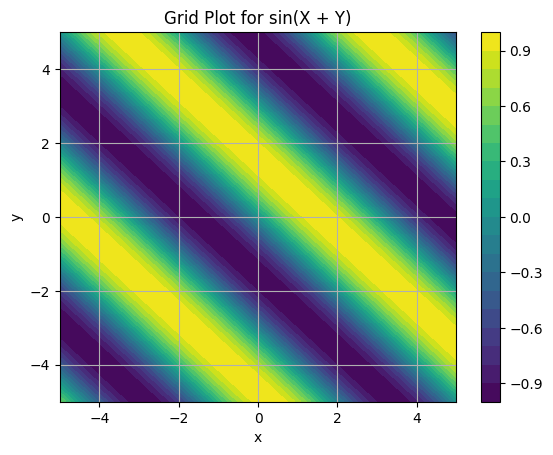

In [8]:
x = np.linspace(-5, 5, 50)
y = np.linspace(-5, 5, 50)

X, Y = np.meshgrid(x, y)

Z = np.sin((X + Y))

plt.contourf(X, Y, Z, 20, cmap='viridis')
plt.colorbar()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Grid Plot for sin(X + Y)")
plt.grid(True)
plt.show()

**20.2 - Finite Difference Approximating Derivatives**

The derivative of a funciton can be found using a limit as x approaches a. It is also the slope of the function at point a.
* The forward difference is to estimate the slope of the function at $x_j$ using the line that connects $(x_j, f(x_j))$ and $(x_{j+1}, f(x_{j+1}))$.
* The backward difference is to estimate the slope of the function at $x_j$ using the line that connects $(x_{j-1}, f(x_{j-1}))$ and $(x_j, f(x_j))$.
* The central difference is to estimate the slope of the function at $x_j$ using the line that connects $(x_{j-1}, f(x_{j-1}))$ and $(x_{j+1}, f(x_{j+1}))$.

Finite Difference Approximating Derivatives with Taylor Series
* For an arbitrary function f(x) the Taylor series of f around $a = x_j$ is $f(x) = [f(x_j)(x-x_j)^0]/0! + [f'(x_j)(x-x_j)^1]/1! + [f(x_j)(x-x_j)^2]/2! + ...$
* The forward difference is $f'(x_j) ≈ [f(x_{j+1}) - f(x_j)]/h + O(h)$.
* The backward difference is $f'(x_j) ≈ [f(x_j) - f(x_{j-1}]/h + O(h)$.
* The central difference is $f'(x_j) ≈ [f(x_{j+1}) - f(x_{j-1})]/2h + O(h)$.

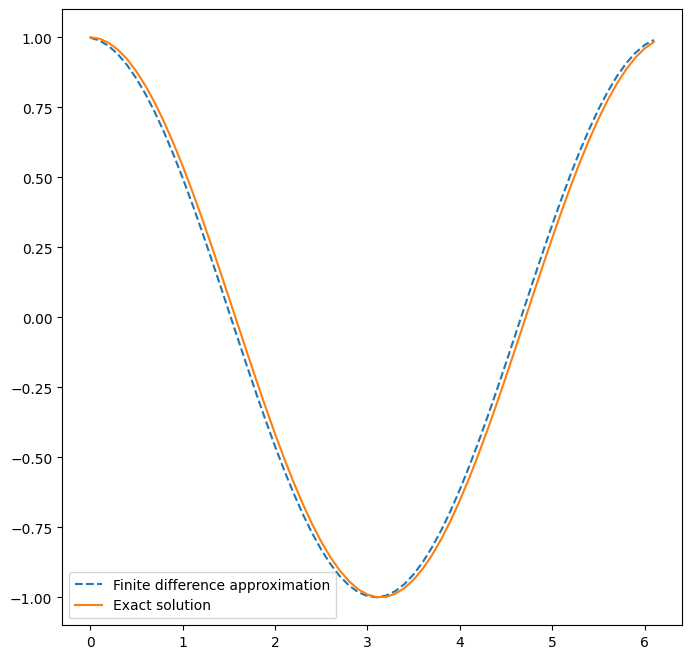

Max Error: 0.04997515074549317


In [15]:
h = 0.1 # step size
x = np.arange(0, 2*np.pi, h)
y = np.sin(x)

forward_diff = np.diff(y)/h # vector of forward differences
x_diff = x[:-1:] # corresponding grid
exact_solution = np.cos(x_diff)

# plot
plt.figure(figsize = (8,8))
plt.plot(x_diff, forward_diff, '--', label = 'Finite difference approximation')
plt.plot(x_diff, exact_solution, label = 'Exact solution')
plt.legend()
plt.show()

# compute max error
max_error = max(abs(exact_solution - forward_diff))
print("Max Error: " + str(max_error))

Since the error is so small, it is same to claim that this is a good approximation to use.

**20.3 - Approximating of Higher Order Derivatives**

It is possible to use Taylor series to approximate higher order derivatives. For example, taking the Taylor series around $a = x_j$ and then computing it at $x = x_{j-1}$ and $x_{j+1}$ gives:

$f''(x_j) ≈ [f(x_{j+1}) - 2f(x_j) + f(x_{j-1})]/h^2 + O(h^2)$.

**20.4 - Numerical Differentiation with Noise**

Sometimes data can be contaiminated with noise, meaning its value is off by a small amount from what it would be if it were computed frmo a pure mathematical function.

To illustrate the point, we numerically compute the derivative of a simple cosine wave corrupted by a small sine wave. Consider the following:

$f(x) = cos(x) $ and $f_{ϵ,ω} = cos(x) + ϵ sin(ωx)$

where 0 < ϵ << 1 is a very small number and ω is a large number. When ϵ is small, it is clear that $f ≈ f_{ϵ,ω}$.

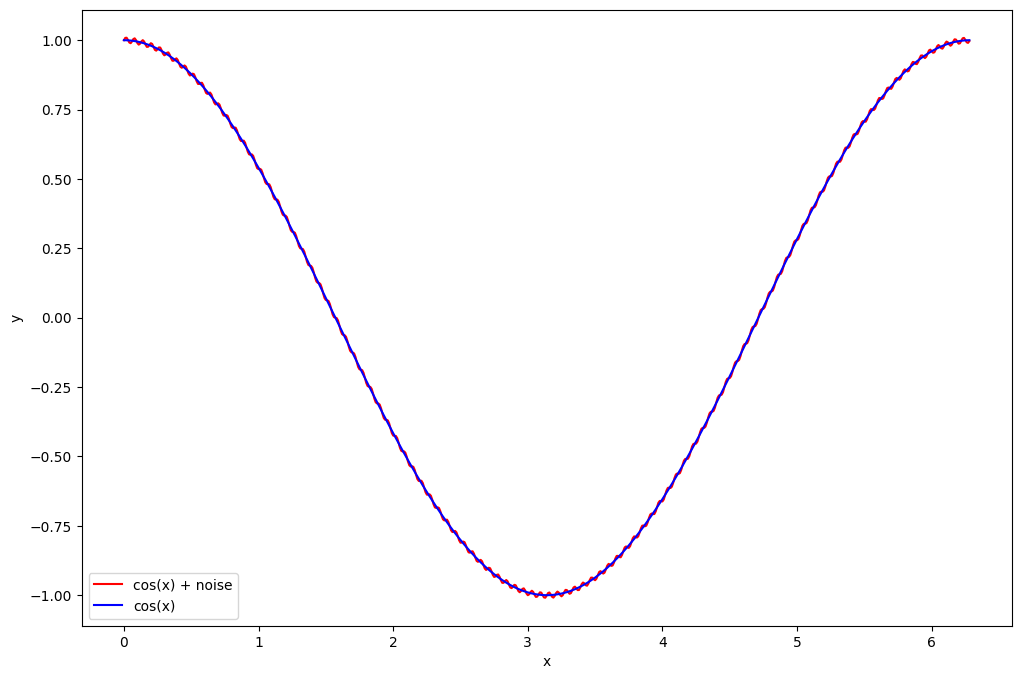

In [18]:
%matplotlib inline

x = np.arange(0, 2*np.pi, 0.01)

# compute function
omega = 100
epsilon = 0.01
y = np.cos(x)
y_noise = y + epsilon*np.sin(omega*x)

# plot
plt.figure(figsize = (12, 8))
plt.plot(x, y_noise, 'r-', label = 'cos(x) + noise')
plt.plot(x, y, 'b-', label = 'cos(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

The derivatives of our two test functions are

$f'(x) = -sin(x)$ and $f'_{ϵ,ω} = -sin(x) + ϵωcos(ωx)$.

Since ϵω may not be smalal when ω is large, the contribution of the noise to the derivative may not be small. As a result, the derivative may not be usable.

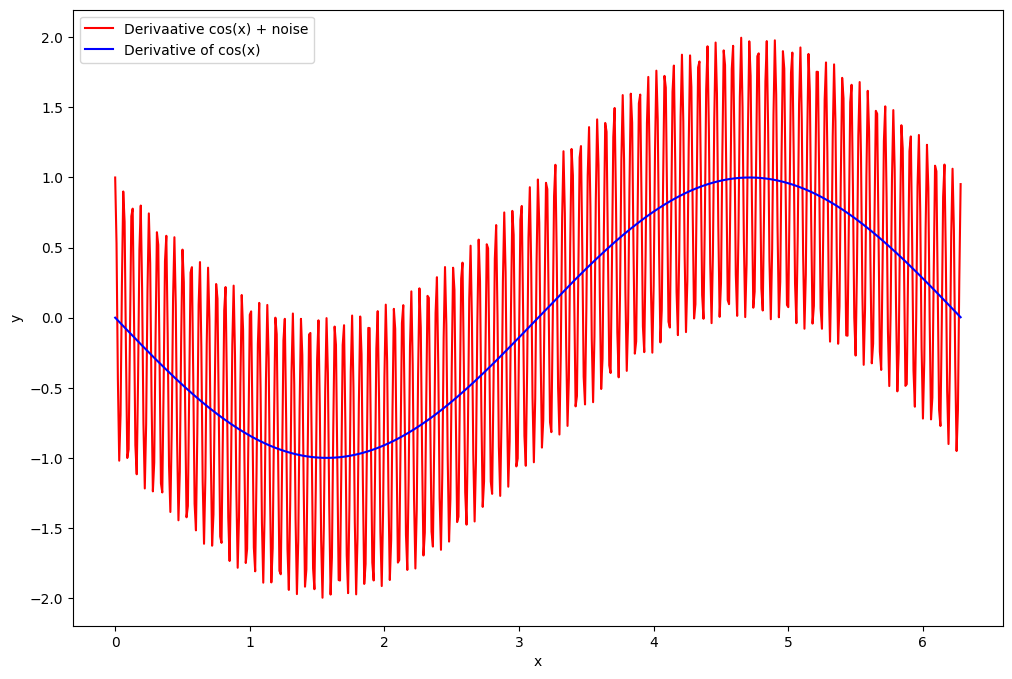

In [19]:
x = np.arange(0, 2*np.pi, 0.01)

# compute
y = -np.sin(x)
y_noise = y + epsilon*omega*np.cos(omega*x)

# plot
plt.figure(figsize = (12, 8))
plt.plot(x, y_noise, 'r-', label = 'Derivaative cos(x) + noise')
plt.plot(x, y, 'b-', label = 'Derivative of cos(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()